Jumlah gambar NATURAL: 3050
Jumlah gambar DROWSY: 2809
Contoh gambar normal:


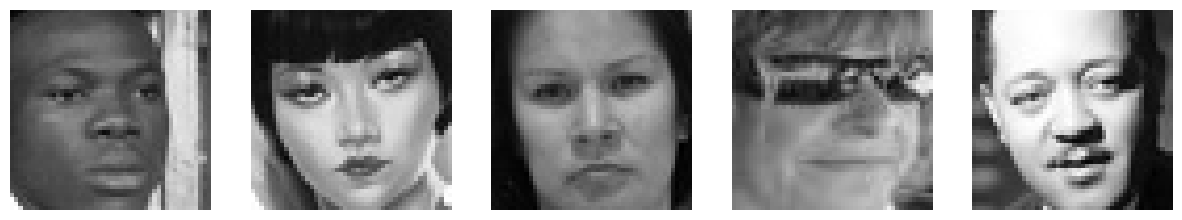

Contoh gambar mengantuk:


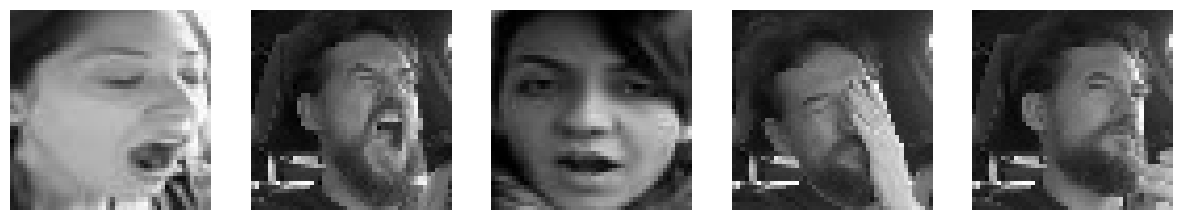

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image

# Path dataset
data_dir = 'dataset'
train_dir = os.path.join('train')  
test_dir = os.path.join('test')    

# Cek jumlah gambar per kelas
categories = ['NATURAL', 'DROWSY']
for category in categories:
    path = os.path.join(train_dir, category)
    if os.path.exists(path):  
        valid_images = [f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f'Jumlah gambar {category}:', len(valid_images))
    else:
        print(f"Folder {category} tidak ditemukan!")

# Fungsi untuk menampilkan gambar
def plot_images(category, num=5):
    path = os.path.join(train_dir, category)
    
    if not os.path.exists(path):
        print(f"Folder {category} tidak ditemukan!")
        return

    images = [f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:num]
    
    if len(images) == 0:
        print(f"Tidak ada gambar ditemukan dalam kategori {category}")
        return

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    
    if len(images) == 1:  # Jika hanya ada 1 gambar, buat subplot tetap dalam array
        axes = [axes]

    for i, img in enumerate(images):
        img_path = os.path.join(path, img)
        try:
            image = Image.open(img_path).convert("RGB")  # Konversi ke RGB
            axes[i].imshow(image)
            axes[i].axis('off')
        except Exception as e:
            print(f"Error membaca file {img_path}: {e}")
    
    plt.show()

# Tampilkan contoh gambar
print("Contoh gambar normal:")
plot_images('NATURAL')

print("Contoh gambar mengantuk:")
plot_images('DROWSY')


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator untuk preprocessing & augmentasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    rotation_range=15,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,  
    validation_split=0.2  
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


Found 4688 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,969 (1.36 MB)

 Trainable params: 355,521 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 113s 747ms/step - accuracy: 0.7710 - loss: 0.6407 - val_accuracy: 0.5209 - val_loss: 2.5210
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8849 - loss: 0.2648 - val_accuracy: 0.5209 - val_loss: 2.2560
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9191 - loss: 0.2043 - val_accuracy: 0.7105 - val_loss: 0.6089
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9421 - loss: 0.1604 - val_accuracy: 0.6943 - val_loss: 0.9279
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9464 - loss: 0.1274 - val_accuracy: 0.8702 - val_loss: 0.3857
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9603 - loss: 0.1059 - val_accuracy: 0.8651 - val_loss: 0.3776
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9560 - loss: 0.1124 - val_accuracy: 0.8446 - val_loss: 0.4863
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9689 - loss: 0.0795 

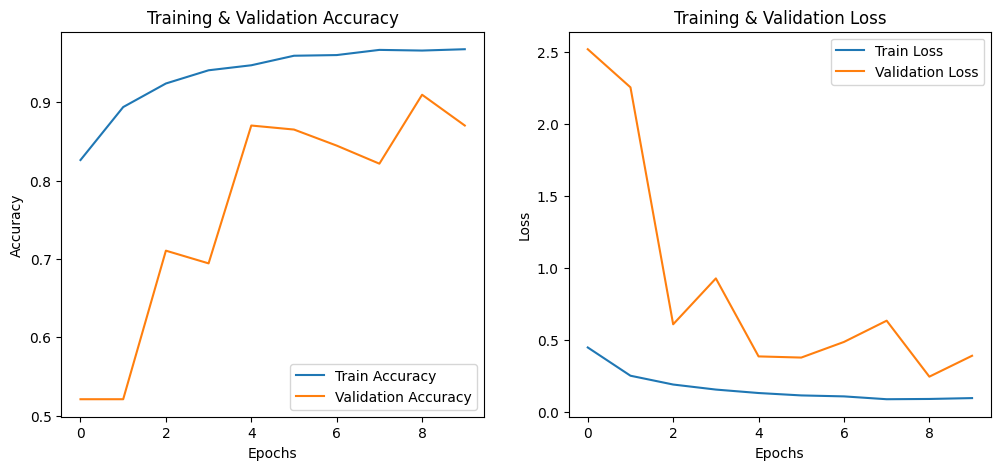

47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 337ms/step - accuracy: 0.9808 - loss: 0.0618
Akurasi pada data uji: 0.9724


In [13]:
# Load dataset dengan ImageDataGenerator
batch_size = 32
image_size = (48, 48)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='binary'
)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Tampilkan arsitektur model
model.summary()

# Training model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Evaluasi model
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')

    plt.show()

plot_history(history)

# Evaluasi pada data uji
test_loss, test_acc = model.evaluate(test_generator)
print(f'Akurasi pada data uji: {test_acc:.4f}')

In [2]:
!pip install tensorflow


^C


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.14.1-cp311-cp311-win_amd64.whl.metadata (50 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cach

  You can safely remove it manually.


Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 106s 561ms/step - accuracy: 0.5550 - loss: 11.3304 - val_accuracy: 0.4895 - val_loss: 9.7900 - learning_rate: 0.0010
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 83s 450ms/step - accuracy: 0.6284 - loss: 5.8738 - val_accuracy: 0.6089 - val_loss: 3.4751 - learning_rate: 0.0010
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 89s 482ms/step - accuracy: 0.6952 - loss: 3.0565 - val_accuracy: 0.8490 - val_loss: 2.0491 - learning_rate: 0.0010
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 87s 473ms/step - accuracy: 0.7441 - loss: 2.0232 - val_accuracy: 0.8038 - val_loss: 1.6094 - learning_rate: 0.0010
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 86s 464ms/step - accuracy: 0.7687 - loss: 1.6180 - val_accuracy: 0.7471 - val_loss: 1.3945 - learning_rate: 0.0010
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 87s 472ms/step - accuracy: 0.7949 - loss: 1.3635 - val_accuracy: 0.7471 - val_loss: 1.3800 - learning_rate: 0.0010
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 85s 463ms/step - accuracy: 0

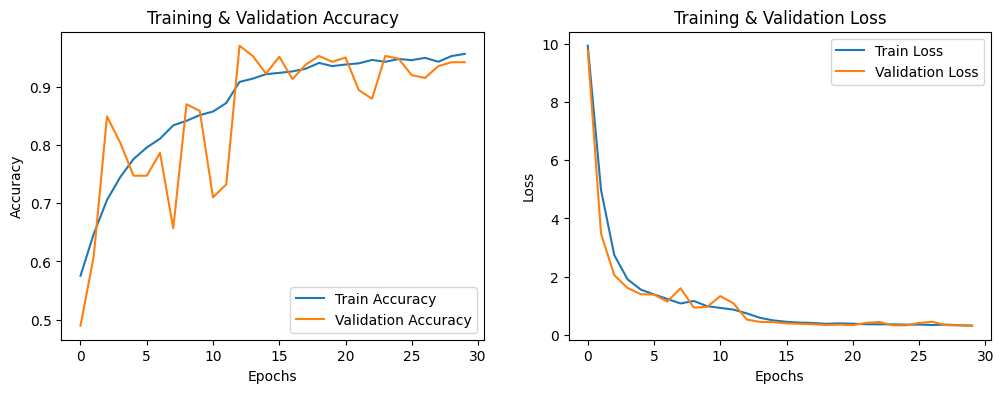

Found 1483 images belonging to 2 classes.
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step
Confusion Matrix:


 [[710  47]
 [ 39 687]]
Classification Report:
               precision    recall  f1-score   support

      DROWSY       0.95      0.94      0.94       757
     NATURAL       0.94      0.95      0.94       726

    accuracy                           0.94      1483
   macro avg       0.94      0.94      0.94      1483
weighted avg       0.94      0.94      0.94      1483



In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot Training History
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    # Loss
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    
    plt.show()

plot_history(history)

# Evaluasi Model
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Prediksi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", class_report)

model.save("model_terlatih.h5")


In [16]:
# Evaluasi Model
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Prediksi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", class_report)


Found 1483 images belonging to 2 classes.


c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step
Confusion Matrix:
 [[671  86]
 [  7 719]]
Classification Report:
               precision    recall  f1-score   support

      DROWSY       0.99      0.89      0.94       757
     NATURAL       0.89      0.99      0.94       726

    accuracy                           0.94      1483
   macro avg       0.94      0.94      0.94      1483
weighted avg       0.94      0.94      0.94      1483



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load Model yang sudah dilatih
model_path = "model_terlatih.h5"  # Ganti dengan path model yang sesuai
model = keras.models.load_model(model_path)

# Mendapatkan mapping kelas dari training generator
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Membalik key-value

# Inisialisasi Webcam
cap = cv2.VideoCapture(0)  # 0 untuk webcam default

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocessing Image
    img = cv2.resize(frame, (128, 128))  # Resize gambar ke ukuran input model
    img = img.astype("float32") / 255.0  # Normalisasi nilai pixel
    img = img_to_array(img)  # Ubah menjadi array numpy
    img = np.expand_dims(img, axis=0)  # Tambahkan dimensi batch
    
    # Prediksi
    prediction = model.predict(img)
    class_index = np.argmax(prediction)  # Ambil indeks dengan probabilitas tertinggi
    class_label = class_labels[class_index]  # Ambil label kelas

    # Tampilkan hasil prediksi pada frame
    cv2.putText(frame, f"Prediksi: {class_label}", (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Tampilkan video
    cv2.imshow("Webcam Prediction", frame)
    
    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Tutup Webcam
cap.release()
cv2.destroyAllWindows()


NameError: name 'keras' is not defined

In [23]:
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if ret:
    print("Webcam berhasil menangkap gambar!")
    cv2.imwrite("test.jpg", frame)  # Simpan gambar untuk dicek manual
else:
    print("Webcam tidak berfungsi.")


Webcam berhasil menangkap gambar!


In [5]:
import cv2
print(cv2.__version__)


4.11.0


In [ ]:
!pip install opencv-python-headless


^C


  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)


# MobileNetV2

Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 16s 2us/step


c:\Users\Asus VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 71s 360ms/step - accuracy: 0.6820 - loss: 0.6561 - val_accuracy: 0.9400 - val_loss: 0.1685 - learning_rate: 0.0010
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 316ms/step - accuracy: 0.8309 - loss: 0.3571 - val_accuracy: 0.9049 - val_loss: 0.1677 - learning_rate: 0.0010
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 59s 318ms/step - accuracy: 0.8467 - loss: 0.3212 - val_accuracy: 0.9049 - val_loss: 0.1823 - learning_rate: 0.0010
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 59s 321ms/step - accuracy: 0.8731 - loss: 0.2811 - val_accuracy: 0.9184 - val_loss: 0.1642 - learning_rate: 0.0010
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 49s 267ms/step - accuracy: 0.8832 - loss: 0.2660 - val_accuracy: 0.9346 - val_loss: 0.1465 - learning_rate: 0.0010
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 51s 276ms/step - accuracy: 0.8832 - loss: 0.2473 - val_accuracy: 0.9366 - val_loss: 0.1560 - learning_rate: 0.0010
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.8

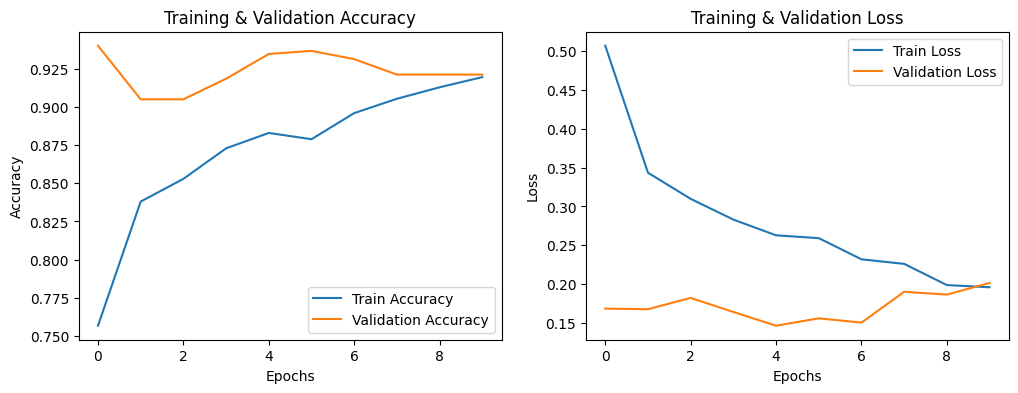

Found 1483 images belonging to 2 classes.
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step
Confusion Matrix:
 [[695  62]
 [ 35 691]]
Classification Report:
               precision    recall  f1-score   support

      DROWSY       0.95      0.92      0.93       757
     NATURAL       0.92      0.95      0.93       726

    accuracy                           0.93      1483
   macro avg       0.93      0.93      0.93      1483
weighted avg       0.94      0.93      0.93      1483



In [20]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained MobileNetV2 (Tanpa Fully Connected Layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze Semua Layer MobileNetV2
base_model.trainable = False

# Tambahkan Layer Kustom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)

# Bangun Model Akhir
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot Training History
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    
    # Loss
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    
    plt.show()

plot_history(history)

# Evaluasi Model
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Prediksi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", class_report)


# LSTM